In [116]:
# Importing the required libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from sklearn.model_selection import train_test_split
from skimage import io
from skimage.transform import resize
import numpy as np
import zipfile


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [5]:
zip_file = r'D:\Nural Networks\Project\Data.zip'
data_file =r'D:\Nural Networks\Project\extracted_data'

os.makedirs(data_file, exist_ok= True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(data_file)




In [6]:
train_file_path = pathlib.Path("extracted_data\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
test_file_path = pathlib.Path("extracted_data\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [20]:
print(len(list(train_file_path.glob('*/*'))))
print(len(list(test_file_path.glob('*/*'))))

2239
118


In [23]:
pip install Augmentor


In [25]:
import Augmentor

In [26]:
batch_size = 32
img_height = 180
img_width = 180

In [31]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_file_path,seed = 123, validation_split=0.25,subset = 'training',image_size=(img_height, img_width),batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(train_file_path,seed = 123, validation_split=0.25,subset = 'validation',image_size=(img_height, img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1680 files for training.
Found 2239 files belonging to 9 classes.
Using 559 files for validation.


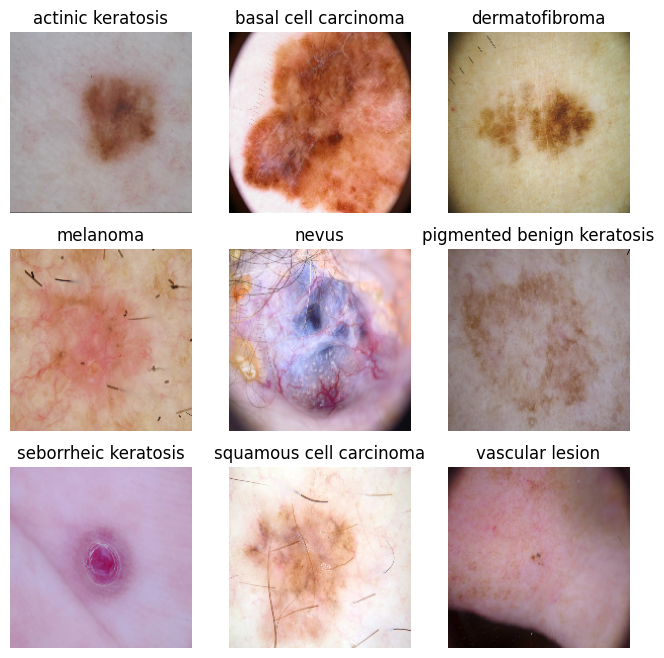

In [48]:
import matplotlib.pyplot as plt
class_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis',
              'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
fig = plt.figure(figsize=(8,8))
for images, labels in train_ds.take(1):

    for i in range(9):
        ax = fig.add_subplot(3,3,1+i)
        plt.imshow(images[i].numpy().astype('uint8'))
        ax.set_title(class_names[i])
        plt.axis('off')

<BarContainer object of 9 artists>

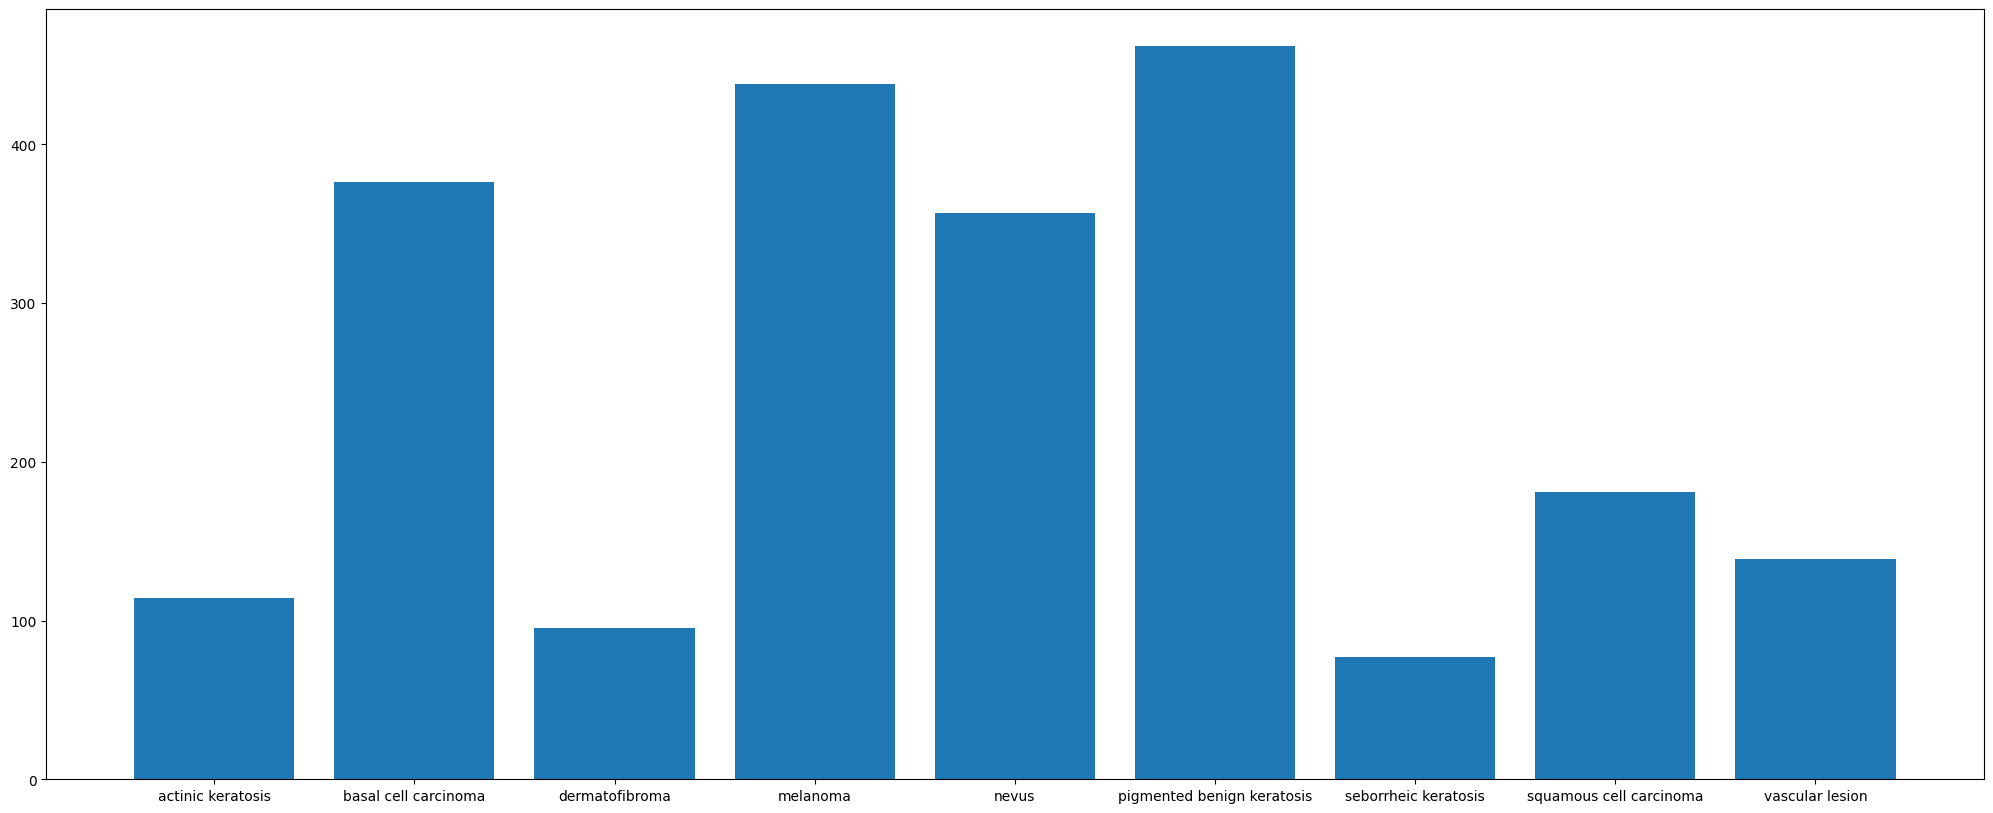

In [49]:
count=[]
for i in class_names:
    count.append(len(list(train_file_path.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [52]:
path_to_training_dataset= "extracted_data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to extracted_data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A3C77C32C8>: 100%|██████████| 500/500 [00:01<00:00, 286.40 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to extracted_data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A3C553B388>: 100%|██████████| 500/500 [00:01<00:00, 315.05 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to extracted_data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A3C553BBC8>: 100%|██████████| 500/500 [00:01<00:00, 316.95 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to extracted_data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1A3C565DC08>: 100%|██████████| 500/500 [00:09<00:00, 54.32 Samples/s]                     


Initialised with 357 image(s) found.
Output directory set to extracted_data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1A3C5654848>: 100%|██████████| 500/500 [00:06<00:00, 73.38 Samples/s]   


Initialised with 462 image(s) found.
Output directory set to extracted_data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A3C3383D08>: 100%|██████████| 500/500 [00:01<00:00, 301.43 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to extracted_data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1A3CC5CBEC8>: 100%|██████████| 500/500 [00:03<00:00, 155.88 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to extracted_data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A3C9AD5608>: 100%|██████████| 500/500 [00:01<00:00, 300.70 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to extracted_data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1A3C3393448>: 100%|██████████| 500/500 [00:01<00:00, 307.57 Samples/s]                  


In [56]:
from glob import glob

In [58]:
path_list = [ x for x in glob(os.path.join(test_file_path, "*","*.jpg"))]
path_list

['extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0010512.jpg',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0010889.jpg',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0024468.jpg',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0024470.jpg',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0024511.jpg',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0024646.jpg',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0024654.jpg',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0024707.jpg',


In [59]:
len(list(path_list))

118

In [62]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(train_file_path, "*","*.jpg"))]
lesion_list

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [63]:
len(lesion_list)

2239

In [65]:
image_count_train = len(list(train_file_path.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [66]:
path_list_new = [x for x in glob(os.path.join(train_file_path, '*','output', '*.jpg'))]
path_list_new

['extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_20495dd5-6af7-421e-96e6-43eb58f211f8.jpg',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_520008d7-c14f-4348-b1fd-59789634f26b.jpg',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7a17c883-6ffe-4d23-b0c7-737d7129a40a.jpg',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_a2c679f1-49b0-4016-aa54-ed1913d0e477.jpg',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_bf4f7e00-d61f-4558-8b20-ebfc11571

In [69]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(train_file_path, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [70]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [72]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
dataframe_dict_original


{'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0010512.jpg': 'actinic keratosis',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0010889.jpg': 'actinic keratosis',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0024468.jpg': 'actinic keratosis',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0024470.jpg': 'actinic keratosis',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0024511.jpg': 'actinic keratosis',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0024646.jpg': 'actinic keratosis',
 'extracted_data\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\actinic keratosis\\ISIC_0024654.jpg':

In [73]:
org_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['path', 'label'])
org_df.shape

(118, 2)

In [74]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = org_df.append(df2)

In [75]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

In [76]:
org_df.head(10)

,path,label
0,extracted_data\Skin cancer ISIC The Internatio...,actinic keratosis
1,extracted_data\Skin cancer ISIC The Internatio...,actinic keratosis
2,extracted_data\Skin cancer ISIC The Internatio...,actinic keratosis
3,extracted_data\Skin cancer ISIC The Internatio...,actinic keratosis
4,extracted_data\Skin cancer ISIC The Internatio...,actinic keratosis
5,extracted_data\Skin cancer ISIC The Internatio...,actinic keratosis
6,extracted_data\Skin cancer ISIC The Internatio...,actinic keratosis
7,extracted_data\Skin cancer ISIC The Internatio...,actinic keratosis
8,extracted_data\Skin cancer ISIC The Internatio...,actinic keratosis
9,extracted_data\Skin cancer ISIC The Internatio...,actinic keratosis


In [77]:
type(lesion_list)

list

In [78]:
org_df.label.value_counts()

actinic keratosis       114
basal cell carcinoma      4
Name: label, dtype: int64

In [79]:
#Splitting the Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_file_path,
  seed=123,
  validation_split = 0.25,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5055 files for training.


In [80]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_file_path,
  seed=123,
  validation_split = 0.25,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1684 files for validation.


In [121]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [162]:
num_classes = 9

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./225,input_shape = (img_height, img_width,3)),
                    layers.Conv2D(16,3, padding ='same', activation = 'relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)



])

In [98]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [163]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 4)

In [164]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_57 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 45, 45, 64)      

In [100]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs, callbacks=[callback]
)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


158/158 [==============================] - ETA: 0s - loss: 1.8944 - accuracy: 0.2880WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001A3C56213A8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
158/158 [==============================] - 36s 219ms/step - loss: 1.8944 - accuracy: 0.2880 - val_loss: 1.6098 - val_accuracy: 0.4121
Epoch 2

In [101]:
model.save('Skin_cancer_cnn1.h5')

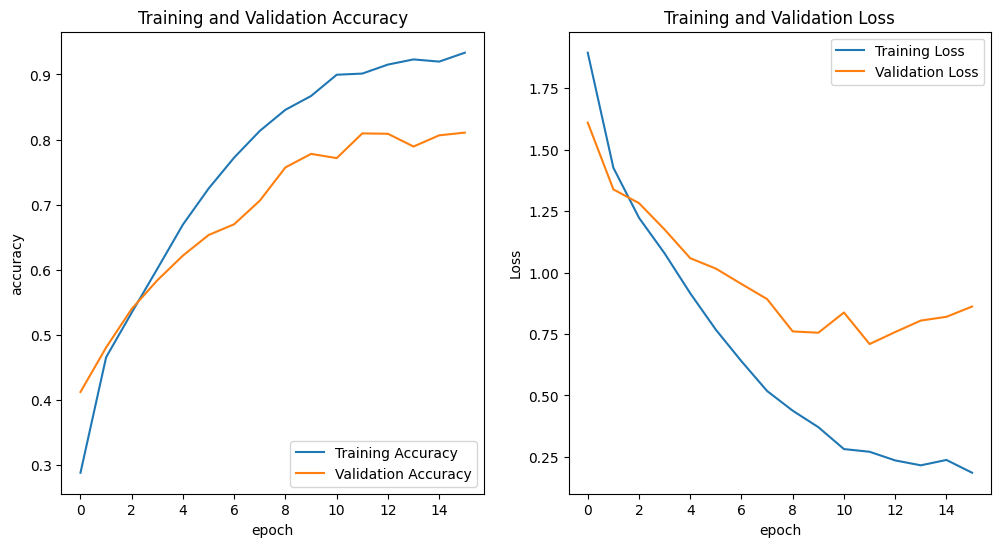

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Training and Validation Loss')
plt.show()

In [104]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('vertical',input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

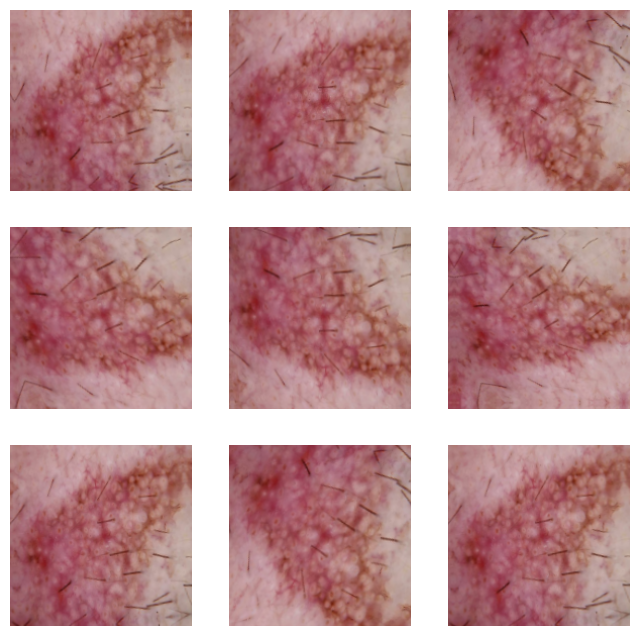

In [106]:
plt.figure(figsize=(8,8))

for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,1+i)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [165]:
model = Sequential([
                    data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Conv2D(64,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Conv2D(32,3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.25),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)



])


In [166]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics =['accuracy']
              )

In [167]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_60 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_61 (Conv2D)          (None, 90, 90, 32)        4640      
                                                     

In [123]:
epochs =100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 4)
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = epochs)


Epoch 1/100
158/158 [==============================] - 76s 481ms/step - loss: 1.0969 - accuracy: 0.5652 - val_loss: 1.2688 - val_accuracy: 0.5243
Epoch 2/100
158/158 [==============================] - 72s 454ms/step - loss: 1.1014 - accuracy: 0.5678 - val_loss: 1.2636 - val_accuracy: 0.5285
Epoch 3/100
158/158 [==============================] - 71s 445ms/step - loss: 1.0936 - accuracy: 0.5804 - val_loss: 1.2953 - val_accuracy: 0.5024
Epoch 4/100
158/158 [==============================] - 69s 439ms/step - loss: 1.0703 - accuracy: 0.5844 - val_loss: 1.2867 - val_accuracy: 0.5238
Epoch 5/100
158/158 [==============================] - 67s 426ms/step - loss: 1.0931 - accuracy: 0.5707 - val_loss: 1.2254 - val_accuracy: 0.5398
Epoch 6/100
158/158 [==============================] - 68s 432ms/step - loss: 1.0468 - accuracy: 0.5956 - val_loss: 1.2549 - val_accuracy: 0.5255
Epoch 7/100
158/158 [==============================] - 68s 433ms/step - loss: 1.0556 - accuracy: 0.5828 - val_loss: 1.2892 -

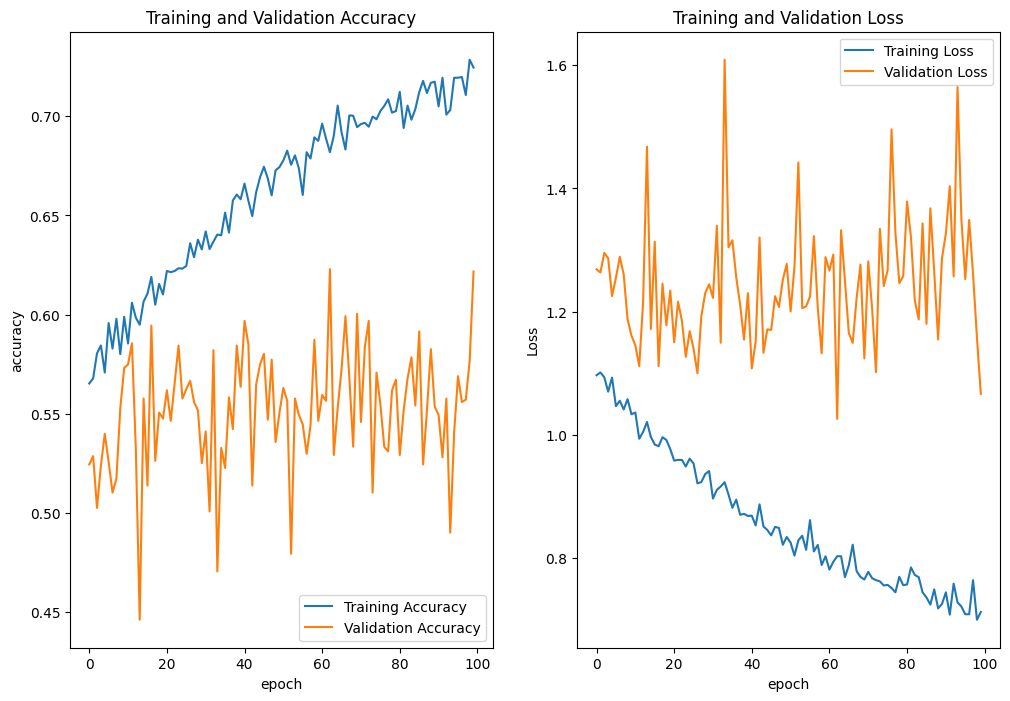

In [125]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Training and Validation Loss')
plt.show()

In [145]:
batch_size = 32
img_height = 180
img_height = 180

In [146]:
model_f = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [147]:
model_f.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [149]:
epochs = 100
history = model_f.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
158/158 [==============================] - ETA: 0s - loss: 3.4002 - accuracy: 0.3066WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001A3858F5B88> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

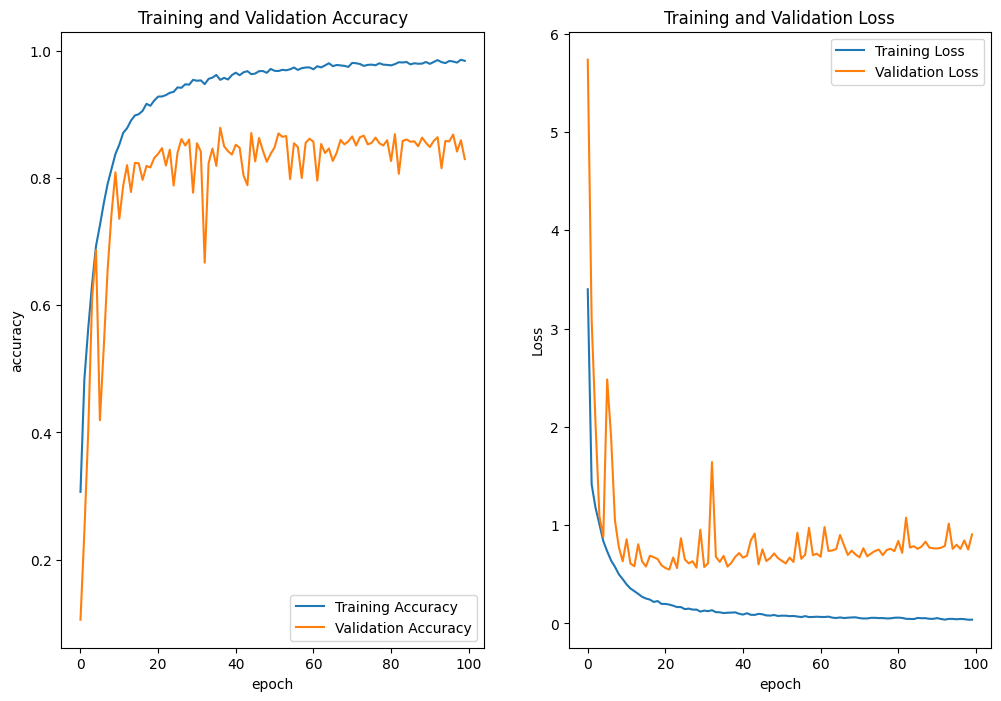

In [153]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Training and Validation Loss')
plt.show()

In [155]:
from sklearn.metrics import confusion_matrix

true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())  # Assuming labels are in NumPy array format

# Get the predicted labels using the trained model
predicted_probs = model_f.predict(val_ds)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print or visualize the confusion matrix
print("Confusion Matrix:")
print(cm)

53/53 [==============================] - 18s 335ms/step
Confusion Matrix:
[[128   3   0   0  19   1   0   1   0]
 [  0 166   1  17   4   8   0   8   1]
 [  0   3 162   2   0   1   0   0   0]
 [  0   1   0 187   9   5  30   0   0]
 [ 26   3   0  22 156   5   0   1   2]
 [  0   7   3  15   8 215   0   0   2]
 [  0   0   0  54   0   0  88   0   0]
 [  0  10   0   3   0   7   0 124   0]
 [  0   1   0   4   0   0   0   0 171]]


In [161]:
model_f.save('Skin_cancer_cnn3.h5')